In [37]:
def plot_features_num_classification(dataframe, target_col="", columns=None, pvalue=0.05):
    """
    Genera pairplots para visualizar la relación entre las columnas numéricas de un dataframe y una columna objetivo, 
    filtrando aquellas columnas que pasan una prueba de ANOVA según un nivel de significación especificado.

    Argumentos:
    dataframe (pd.DataFrame): El dataframe que contiene los datos.
    target_col (str): Nombre de la columna objetivo para la clasificación. Valor por defecto es una cadena vacía.
    columns (list): Lista de nombres de columnas a considerar. Si no se proporciona, se consideran todas las columnas numéricas. Valor por defecto es None.
    pvalue (float): Nivel de significación para la prueba de ANOVA. Valor por defecto es 0.05.

    Retorna:
    list: Devuelve una lista de nombres de columnas que cumplen con el criterio de significación especificado.
    """
    # Validar entradas
    if not isinstance(dataframe, pd.DataFrame):
        raise ValueError("dataframe debe ser un DataFrame de pandas")
    if not isinstance(target_col, str):
        raise ValueError("target_col debe ser un string")
    if columns is not None and not all(isinstance(col, str) for col in columns):
        raise ValueError("columns debe ser una lista de strings")
    if not isinstance(pvalue, (int, float)) or not (0 < pvalue < 1):
        raise ValueError("pvalue debe ser un número entre 0 y 1")
    
    # Si columns es None, igualar a las columnas numéricas del dataframe
    if columns is None:
        columns = dataframe.select_dtypes(include=['number']).columns.tolist()
    else:
        # Filtrar solo las columnas numéricas que están en la lista
        columns = [col for col in columns if dataframe[col].dtype in ['float64', 'int64']]
    
    # Asegurarse de que target_col esté en el dataframe
    if target_col and target_col not in dataframe.columns:
        raise ValueError(f"{target_col} no está en el dataframe")
    
    # Filtrar columnas que cumplen el test de ANOVA
    valid_columns = []
    if target_col:
        unique_classes = dataframe[target_col].unique()
        for col in columns:
            groups = [dataframe[dataframe[target_col] == cls][col].dropna() for cls in unique_classes]
            if len(groups) > 1 and all(len(group) > 0 for group in groups):
                with warnings.catch_warnings():
                    warnings.simplefilter("ignore")
                    f_val, p_val = f_oneway(*groups)
                if p_val < pvalue:
                    valid_columns.append(col)
    else:
        valid_columns = columns

    # Si no hay columnas válidas, retornar una lista vacía
    if not valid_columns:
        return []

    # Configuración de estilos
    sns.set(style="whitegrid", palette="muted", color_codes=True)
    
    # Crear pairplots agrupados
    max_cols_per_plot = 5  # Máximo de columnas por plot
    if target_col:
        for i in range(0, len(valid_columns), max_cols_per_plot):
            plot_columns = valid_columns[i:i+max_cols_per_plot]
            if target_col not in plot_columns:
                plot_columns.append(target_col)
            
            # Depuración: imprimir columnas y verificar contenido de subset_df
            print(f"Plot columns: {plot_columns}")
            print(f"DataFrame shape: {dataframe.shape}")
            print(f"DataFrame columns: {dataframe.columns.tolist()}")
            
            g = sns.PairGrid(dataframe[plot_columns], hue=target_col)
            g.map_diag(sns.histplot, kde=True, edgecolor='black', linewidth=0.5)
            g.map_offdiag(sns.scatterplot, s=10, edgecolor="w", linewidth=0.5)
            g.add_legend()
            plt.show()
    else:
        # Sin target_col, dividir en grupos de max_cols_per_plot
        for i in range(0, len(valid_columns), max_cols_per_plot):
            plot_columns = valid_columns[i:i+max_cols_per_plot]
            
            # Depuración: imprimir columnas y verificar contenido de subset_df
            print(f"Plot columns: {plot_columns}")
            print(f"DataFrame shape: {dataframe.shape}")
            print(f"DataFrame columns: {dataframe.columns.tolist()}")

            g = sns.PairGrid(dataframe[plot_columns])
            g.map_diag(sns.histplot, kde=True, edgecolor='black', linewidth=0.5)
            g.map_offdiag(sns.scatterplot, s=10, edgecolor="w", linewidth=0.5)
            plt.show()
    
    return valid_columns

In [2]:
import pandas as pd
import bootcampviztools as bt
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import f_oneway
import warnings


In [3]:
iris = pd.read_csv("./data/iris.csv")
boston = pd.read_csv("./data/obligatoria_hard.csv", sep = "|")
titanic = pd.read_csv("./data/titanic.csv")

Plot columns: ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
DataFrame shape: (150, 5)
DataFrame columns: ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']


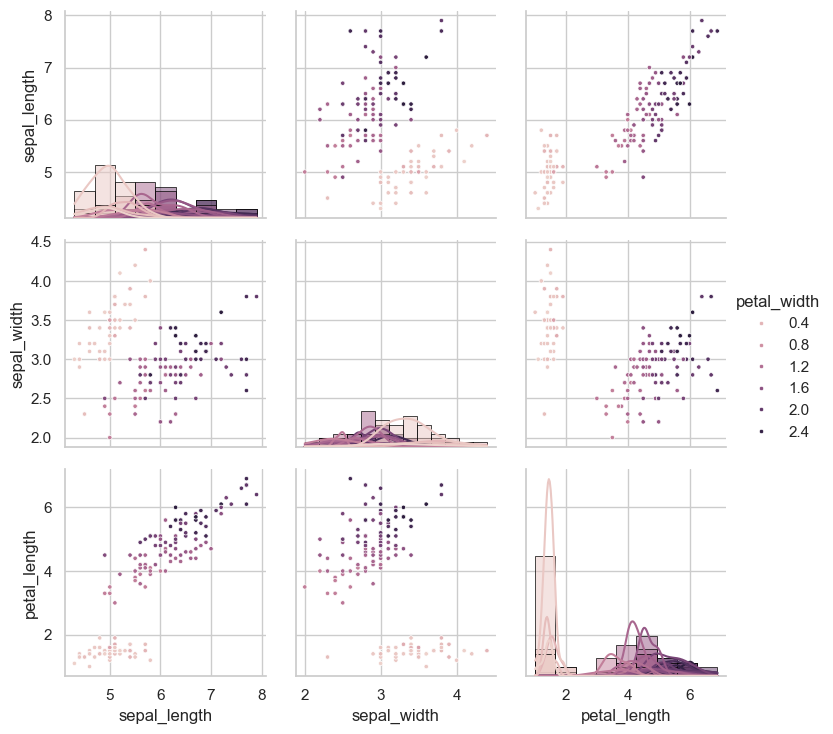

['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

In [38]:
plot_features_num_classification(iris, "petal_width")

Plot columns: ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
DataFrame shape: (150, 5)
DataFrame columns: ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']


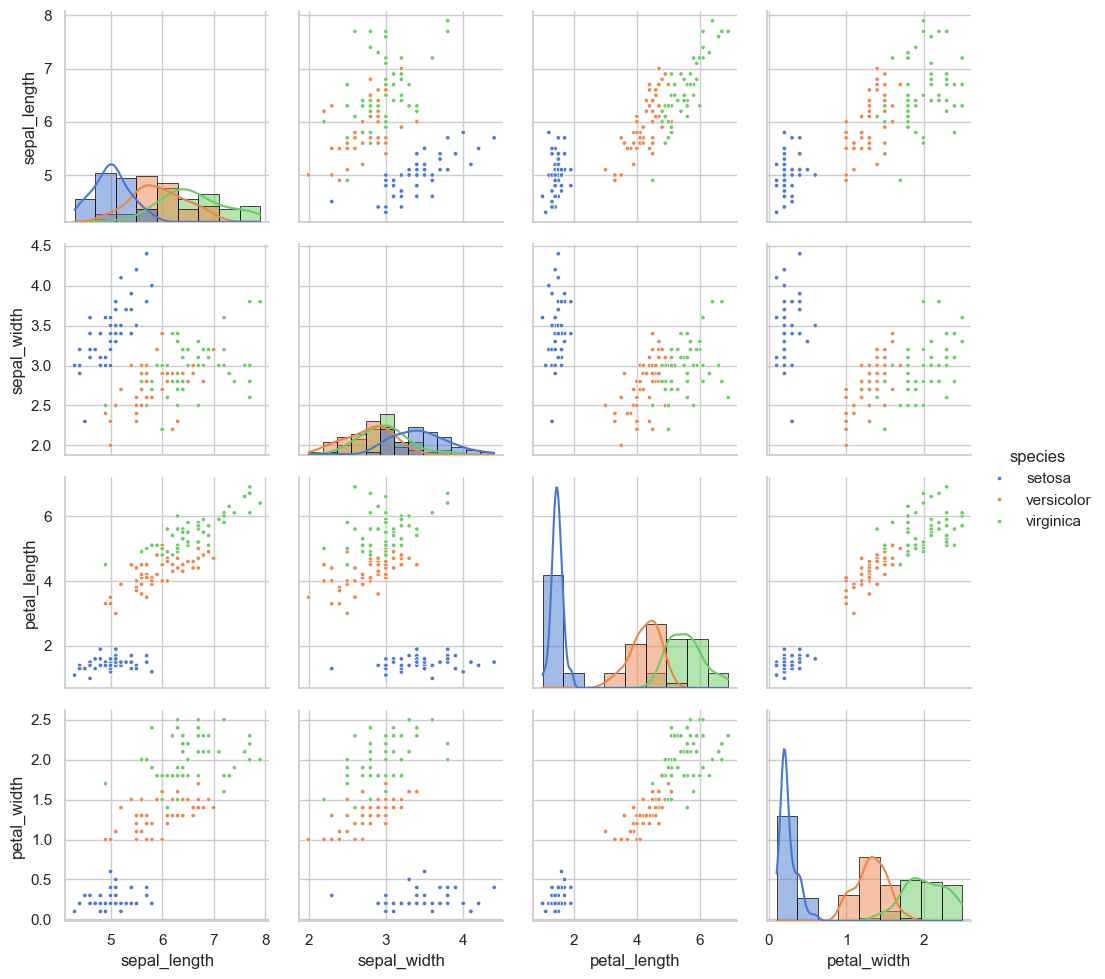

['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

In [39]:
plot_features_num_classification(iris, "species")

Plot columns: ['age', 'sibsp', 'parch', 'fare']
DataFrame shape: (891, 11)
DataFrame columns: ['sex', 'age', 'sibsp', 'parch', 'fare', 'class', 'who', 'adult_male', 'embark_town', 'alive', 'alone']


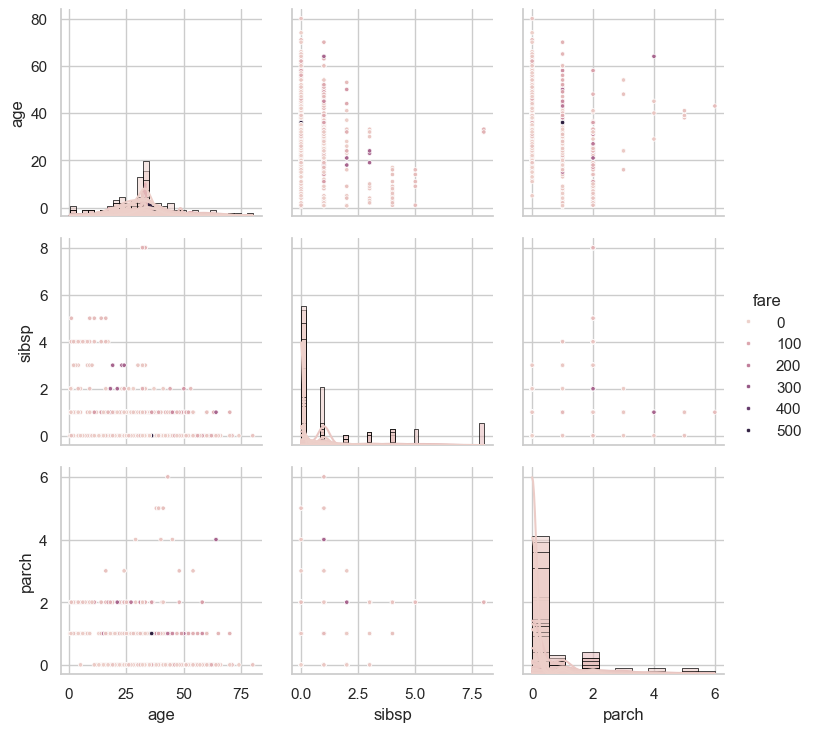

['age', 'sibsp', 'parch', 'fare']

In [40]:
plot_features_num_classification(titanic, "fare")

Plot columns: ['age', 'fare', 'class']
DataFrame shape: (891, 11)
DataFrame columns: ['sex', 'age', 'sibsp', 'parch', 'fare', 'class', 'who', 'adult_male', 'embark_town', 'alive', 'alone']


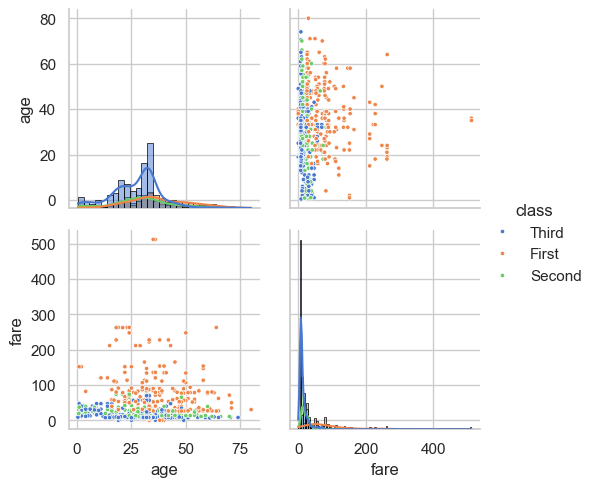

['age', 'fare']

In [41]:
plot_features_num_classification(titanic, target_col="class", columns=["age", "fare"])
